# Practical Statistics for Data Scientists : Data and Sampling Distribution

source : https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/python/notebooks/Chapter%201%20-%20Exploratory%20Data%20Analysis.ipynb

This notebook is a summary of the key points to be extracted from the Book **Practical Statistics for Data Scientists** by Peter Bruce, Andrew Bruce and Peter Gedeck

I will gather the most important concepts as well as python codes that can constitute strong basis for future structured analysis. I will also put some standard concepts as a quick reminder and others that might seem simple but that I am not familiar with.

In [1]:
#Imports
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import trim_mean
import wquantiles

from statsmodels import robust

from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# makes path easy
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
# file load
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'



## Data and Sampling Distribution

* **Binomial** :  A binomial experiment is an experiment where you have a fixed number of independent trials with only have two outcomes. For example, the outcome might involve a yes or no answer. 

* **Sample** : subset of data from a larger data set (population).  
* **population** : large defined set fo data.
* **Random sampling** : process in which each available member of the population has an equal chance of being chosen. The sample result is called **simple random sample**  :  

    * **Sampling with replacement** : observations are put back in the population
    * **Sampling without replacement** : observations no loger available for future draws
    
* **Stratified sampling** : dividing the population into strata and randomly sampling from each strata  
* **Sample Bias** : sample that misrepresents the population


Data Quality matters more thant data Quantity. Quality involves :
* Consistency of format
* cleanliness
* accuracy of individual data points


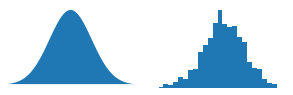

In [4]:
# populaiton and sampling plotting
np.random.seed(seed=1)
x = np.linspace(-3,3,300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5,1.5))

ax = axes[0]
# probability density function
ax.fill(x,stats.norm.pdf(x))
# masquer les axes
ax.set_axis_off()
ax.set_xlim(-3,3)

ax = axes[1]

ax.hist(xsample,bins=30)
# masquer les axes
ax.set_axis_off()
ax.set_xlim(-3,3)
ax.set_position


plt.show()

### Sample mean Vs Population Mean

* $\bar{x}$ : Sample mean represents the mean of a sample
* $\mu$ : represents the mean of a population 

### Regression to the mean

## 2. Sampling distribution of a statistic 

* **Sample statistic** : metric calculated for a sample of data drawn from a larger population  
* **Data distribution** : frequency distribution of individual values in a data set
* **Central Limit theorem** : tendency of the sampling distribution to take on a normal shape as sample size rises
* **Standard Error** : The variability of a sample statistic over many samples

! The larger the sample, the narrower the disribution of the sample statistic

In [5]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [6]:
# Sample of 1000 values
sample_data = pd.DataFrame({'income':loans_income.sample(1000),'type':'Data'})
print('\n Sample of data \n\n',sample_data.head(3))

# Sample of 1000 means of 5 values
sample_mean_05 = pd.DataFrame({'income':[loans_income.sample(5).mean() for _ in range (1000)],'type':'Mean of 5',})
print('\n Sample of 5 \n\n',sample_mean_05.head(3))

# Sample of 1000 means of 20 valeus
sample_mean_20 = pd.DataFrame({'income':[loans_income.sample(20).mean() for _ in range (1000)],'type':'Mean of 20',})
print('\n Sample of 20 \n\n',sample_mean_20.head(3))

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print('\n Results \n\n',results.head())


 Sample of data 

        income  type
40292   63000  Data
38959   92000  Data
17361  134000  Data

 Sample of 5 

     income       type
0  83700.0  Mean of 5
1  56200.0  Mean of 5
2  45000.0  Mean of 5

 Sample of 20 

      income        type
0  81372.55  Mean of 20
1  60432.05  Mean of 20
2  69336.60  Mean of 20

 Results 

          income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


Plotting the sample distribution

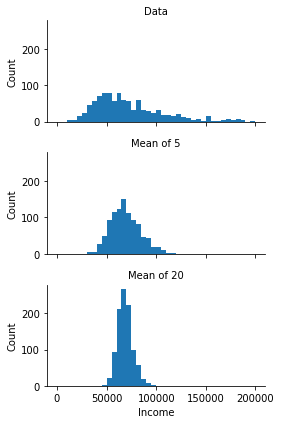

In [7]:
g = sns.FacetGrid(results,col='type',col_wrap=1,height=2,aspect=2)
g.map(plt.hist,'income',range=[0,200000],bins=40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### CentraL Limit Theorem

### Standard Error

single metric that sums up the variability in the sampling distribution for a statistic.

$Standard Error = SE = \frac{s}{\sqrt{n}}$  
with **s** the standard deviation and **n** the sample size

! As the sample size increases, the standard error decreases.

The relationship between standard error and sample size is sometimes referred to as the **square root of n :** to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4. 

## 3. The Bootstrap

estimate the sampling distribution of a statistic, or of model parameters by drawing additional samples with replacement from the sample itself and recalculate the statistic or model for each resample.

A bootstrap sample is a smaller sample that is “bootstrapped” from a larger sample. Bootstrapping is a type of resampling where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

For example, let’s say your sample was made up of ten numbers: 49, 34, 21, 18, 10, 8, 6, 5, 2, 1. You randomly draw three numbers 5, 1, and 49. You then replace those numbers into the sample and draw three numbers again. Repeat the process of drawing x numbers B times. 

* **Resampling** : process of taking repeated samlpes from observed data  
* **Bootstrapping** : implies sampling with necessary remplacement

Bootstrap bias calculation : https://bookdown.org/compfinezbook/introcompfinr/The-Nonparametric-Bootstrap.html

$Bias_{boot} = Mean_{boot} - Estimate$

In [8]:
results = []

# Make 1000 resampling and compute the median of each sample
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original:{loans_income.median()}')
print(f'results mean:{results.mean()}')
print(f'bias:{results.mean() - loans_income.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original:62000.0
results mean:61917.902
bias:-82.09799999999814
std.error: 228.73933106830927


## 4. Confidence Interval

* **Inteval endpoints** : Top and bottom of the confidence interval

Confidence Interval is how much uncertainty there is with any particular statistic. CI are often used with a margin or error. 

The **confidence level** is the percentage of times you expect to get close to the same estimate if you run your experiment again or resample the population in the same way.

    ! The higher the level of confidence, the wider the interval

    ! The smaller the sample, the wider the interval, the greater the  uncertainty.

The **confidence interval** consists of the upper and lower bounds of the estimate you expect to find at a given level of confidence.

**Confidence levels** are expressed as a percentage (for example, a 95% confidence level). It means that should you repeat an experiment or survey over and over again, 95 percent of the time your results will match the results you get from a population (in other words, your statistics would be sound!). **Confidence intervals** are your results and they are usually numbers.

For example, you survey a group of pet owners to see how many cans of dog food they purchase a year. You test your statistic at the 99 percent **confidence level** and get a **confidence interval** of (200,300). That means you think they buy between 200 and 300 cans a year. You’re super confident (99% is a very high level!) that your results are sound, statistically.

Mean : 68760.51844
20 Sample mean : 55734.1
confidence interval [43212.45, 70233.43999999999]


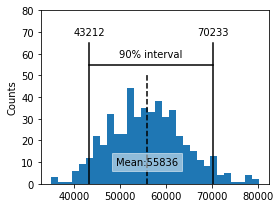

In [9]:
print('Mean :',loans_income.mean())
np.random.seed(seed=3)

#create a sample of 20 loan income data
sample20 = resample(loans_income,n_samples=20,replace=False)
print('20 Sample mean :',sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05,0.95]))
print('confidence interval',confidence_interval)

ax = results.plot.hist(bins=30,figsize=(4,3))
#Confidence interval range bar
ax.plot(confidence_interval,[55,55],color='black')

for x in confidence_interval:
    #interval endpoints limits
    ax.plot([x,x],[0,65],color='black')
    #interval endpoints value
    ax.text(x,70,f'{x:.0f}',horizontalalignment='center',verticalalignment='center')
# text displaying the confidence interval    
ax.text(sum(confidence_interval)/2,60,'90% interval',horizontalalignment='center',verticalalignment='center')

meanIncome = results.mean()
# mean indicator
ax.plot([meanIncome,meanIncome],[0,50],color='black',linestyle='--')
# mean value
ax.text(meanIncome,10,f'Mean:{meanIncome:.0f}',bbox=dict(facecolor='white',edgecolor='white',alpha=0.5),horizontalalignment='center',verticalalignment='center')
ax.set_ylim(0,80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()



## 5. Normal Distribution

* **Error** : Difference between data ppoint and predicted or average value   
* **Standardize** : Substract the mean and divide by the standard deviation  
* **z-score** : result of standardizing an individual data point  
* **Standard Normal** : Normal distribution with mean = 0and standard deviation = 1

In normal Distribution :  
    
    68% of the data lies within a standard deviation  
    
    95% within 2 sd

! Most variables from raw data used in a typical data science project are not normally distributed

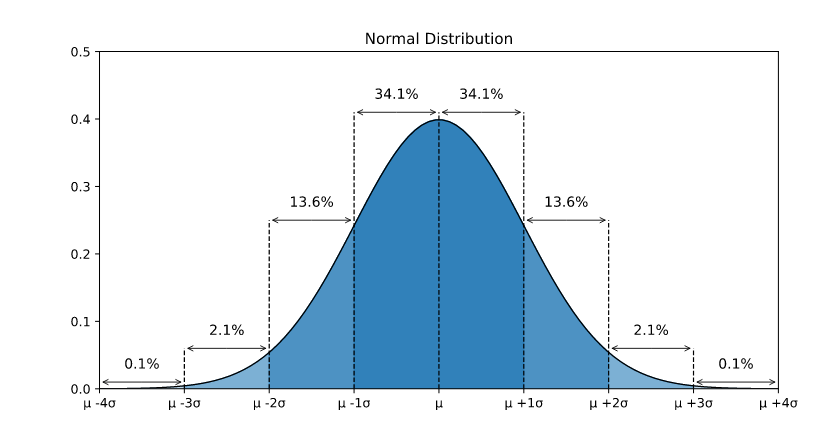

In [10]:
from IPython.display import Image
Image(filename='media//normal_distribution.png') 

### Standard Normal and QQ plot (Quantile - Quantile Plot)

**Standard normal distribution** : distribution in which x-axis represents the standard deivations away from the mean. It is done after the **standardization (normalization )** to put the data on the same scale as the standard normal distribution.

**QQ-Plot**(Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile.  

The purpose of Q Q plots is to find out if two sets of data come from the same distribution.  
If the two data sets come from a common distribution, the points will fall on that reference line

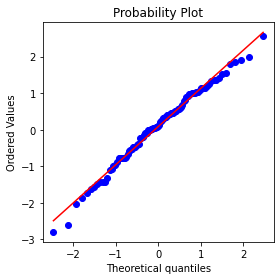

In [11]:
fig, ax = plt.subplots(figsize=(4,4))

#generate random variables
norm_sample = stats.norm.rvs(size=100)
#calculate quantiles for a probability plot
stats.probplot(norm_sample,plot=ax)

plt.tight_layout()
plt.show()

## 6. Long Tailed Distribution

Despite the importance of normal distribution, Data is generally not normally distributed

* **Tail** : long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.  
* **Skew** : where one tail of a distribution is longer than the other

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: NFLX, dtype: float64
[ 0.1941524  -0.28767869 -0.12516315 -0.40546486  0.62415439]


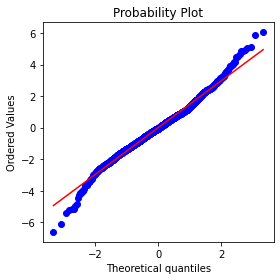

In [12]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
print(nflx.head())

nflx = np.diff(np.log(nflx[nflx>0]))
print(nflx[:5])
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx,plot=ax)

plt.tight_layout()
plt.show()

### Student's t-Distribution

The T distribution (also called Student’s T Distribution) is a family of distributions that look almost identical to the normal distribution curve, only a bit shorter and fatter. The t distribution is used instead of the normal distribution when you have small samples. The larger the sample size, the more the t distribution looks like the normal distribution.